# Random Walk

Es un proceso obtenido al sumar incrementos (deltas) aleatorios en una serie de pasos.

In [ ]:
# Creamos un array de 100 elementos con la distribución de Rademacher (+1/-1)
#pip install tensorflow
#pip install -U tensorflow
#pip install -U dm-sonnet==1.23
#pip install --upgrade tfp-nightly
#https://towardsdatascience.com/the-ultimate-tensorflow-gpu-installation-guide-for-2022-and-beyond-27a88f5e6c6e
import tensorflow as tf
import os

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 3 = INFO, WARNING, and ERROR messages are not printed

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions # By convention, we refer to the tf probability distributions library as tfd
import seaborn as sns
from matplotlib import pyplot as plt

# Discrete random variable
# https://www.tensorflow.org/probability/api_docs/python/tfp/random/rademacher
rademacher = tfp.random.rademacher([1, 100], dtype=tf.int32)
print(rademacher)

## La distribución Rademacher

La distribución Rademacher es una distribución discreta que toma dos valores, +1 y -1, con igual probabilidad. Se utiliza a menudo en el análisis de álgebra lineal y el aprendizaje automático como una forma de evaluar el rendimiento de un modelo de aprendizaje automático.

## Tensorflow

TensorFlow es una muy importante librería de aprendizaje automático y ciencia de datos. Se utiliza para entrenar y explotar modelos de aprendizaje automático como por ejemplo: detección de spam, traducción automática, clasificación de imágenes y análisis de sentimientos.

In [ ]:
# Usamos un heatmap para visualizar arrays y tensores grandes
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniforme = np.random.rand(10, 10).round(2)
print(uniforme)
ax = sns.heatmap(uniforme, linewidth=0.5)
plt.show()

## Mapa de calor

sns.heatmap es una función de la biblioteca de visualización de datos seaborn de Python. Se utiliza para crear un mapa de calor, que es una gráfica de dos dimensiones que muestra los valores de una tabla de datos a través de una escala de colores. Los valores más altos se representan con colores más cálidos, mientras que los valores más bajos se representan con colores más fríos.

In [ ]:
# Visualizar un vector o tensor unidimensional
ax = sns.heatmap(rademacher)
plt.show()

In [ ]:
# Visualizar una matriz o tensor bidimensional
rademacher2D = tfp.random.rademacher([100, 100], dtype=tf.int32)
print(tf.shape(rademacher2D))
ax = sns.heatmap(rademacher2D)
plt.show()

In [ ]:
# No podemos visualizar gráficamente un tensor tridimensional
rademacher3D = tfp.random.rademacher([100, 100, 100], dtype=tf.int32)
print(tf.shape(rademacher3D))
print(rademacher3D)

## Álgebra lineal y aprendizaje automático

En álgebra lineal y en el aprendizaje automático, se utilizan diferentes tipos de objetos matemáticos para representar y manipular datos. Algunos de los más comunes son los escalares, los vectores y los tensores.

Un escalar es un número simple, como 3 o pi. Un vector es un arreglo ordenado de números, como [1, 2, 3] o [4, 5, 6]. Un tensor es una generalización de un vector a más dimensiones. Por ejemplo, un tensor de dos dimensiones se puede ver como una matriz, mientras que un tensor de tres dimensiones se puede ver como un cubo de números.

En el aprendizaje automático, a menudo se utilizan vectores y tensores para representar datos. Por ejemplo, un vector puede utilizarse para representar una observación individual, mientras que un tensor de dos dimensiones puede utilizarse para representar un conjunto de observaciones. Los tensores también se utilizan a menudo en el procesamiento de imágenes, donde cada elemento del tensor representa el valor de un pixel en una imagen.

En resumen, un escalar es un número simple, un vector es un arreglo ordenado de números y un tensor es una generalización de un vector a más dimensiones.

In [ ]:
# Iterando un tensor unidimensional o vector de 100 componentes
for i in range(0, 100):
    print(rademacher[0, i].numpy())

In [ ]:
# Sumando cada componente como un incremento aleatorio obtengo un random walk
randomWalk = np.zeros(shape=(100))
sumatorio = 0
for i in range(0, 100):
    sumatorio += rademacher[0, i].numpy()
    randomWalk[i] = sumatorio

print(randomWalk)

In [ ]:
plt.plot(randomWalk)
plt.show()

## ¿Qué es un Random Walk?

Un Random Walk es un proceso estocástico en el que el siguiente paso depende del anterior de manera aleatoria. Es una forma simple de generar secuencias de números aleatorios.

Se utiliza en física, economía y ciencia de datos:

- En la física, un Random Walk se puede utilizar como un modelo simple de la dinámica de las partículas en un gas o en un líquido.

- En la economía, un Random Walk se puede utilizar como un modelo simple de la fluctuación del precio de una acción o de una moneda.

- En el aprendizaje automático, un Random Walk se puede utilizar como una forma simple de generar datos aleatorios para probar algoritmos o evaluar la robustez de modelos.

In [ ]:
# Ejercicio:

# Escribe una función que acepte un argumento o parámetro como input: N
# Y esta función va a generar un tensor unidimensional (un vector) de N componentes con la distribución Rademacher.
# Luego lo iterará para construir el vector randomWalk.
# Finalmente lo dibuja como en el caso de arriba.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(N):
  # Genera un tensor unidimensional de N componentes con la distribución Rademacher
  steps = np.random.choice([-1, 1], size=N)

  # Construye el vector random walk sumando los pasos
  random_walk = np.cumsum(steps)

  # Dibuja el vector random walk
  plt.plot(random_walk)
  plt.show()
random_walk(10000)

## ¿Qué hace la función np.cumsum?

np.cumsum es una función de la biblioteca numpy que se utiliza para calcular la suma acumulativa de un tensor. Esto significa que, para cada elemento del tensor, se calcula la suma de todos los elementos anteriores.

Por ejemplo, si tienes el siguiente tensor:

[1, 2, 3, 4]

La función np.cumsum calcularía la siguiente secuencia de sumas acumulativas:

[1, 3, 6, 10]

La función np.cumsum puede calcular este sumatorio a lo largo de un eje específico de un tensor. Por ejemplo, en un tensor de dos dimensiones o matriz, puede sumar por filas o por columnas.

In [ ]:
# Random walk 2D
import pandas as pd

def drawRandomWalk2D(numIteraciones = 100):
    # Creo tensor con números aleatorios para deltas
    rademacher2D = tfp.random.rademacher([1, numIteraciones * 2], dtype=tf.int32)

    # Creo dataframe vacío con dos columnas para X e Y
    randomWalk2D = pd.DataFrame(np.zeros(shape=(numIteraciones)), columns=['X'])
    randomWalk2D["Y"] = pd.DataFrame(np.zeros(shape=(numIteraciones)))
    print(randomWalk2D)

    # Aplico los deltas para ir encontrando las coordenadas de los puntos que definen
    # el randomWalk en el plano 2D
    sumatorioX, sumatorioY = 0, 0
    for i in range(0, numIteraciones):
        delta = rademacher2D[0, i].numpy()
        
        if i%2 == 0: # Si i es par
            sumatorioX += delta
        else: # Si es impar
            sumatorioY += delta
        randomWalk2D["X"][i] = sumatorioX
        randomWalk2D["Y"][i] = sumatorioY

    print(randomWalk2D)

    plt.plot(randomWalk2D)
    plt.show()

    plt.plot(randomWalk2D["X"], randomWalk2D["Y"])
    plt.show()

In [ ]:
drawRandomWalk2D(10000)


In [ ]:
# Es posible generar un random walk en dos dimensiones
# utilizando la librería numpy para generar los deltas (o pasos) aleatorios
# en vez de usar tensorflow

import numpy as np
import matplotlib.pyplot as plt

def random_walk_2d(N):
  # Genera pasos aleatorios en dos dimensiones
  steps_x = np.random.choice([-1, 1], size=N)
  steps_y = np.random.choice([-1, 1], size=N)

  # Construye el random walk sumando los pasos en cada dimensión
  random_walk_x = np.cumsum(steps_x)
  random_walk_y = np.cumsum(steps_y)

  # Dibuja el random walk
  plt.plot(random_walk_x, random_walk_y)
  plt.show()

# Para utilizar esta función, simplemente la invocamos pasando el número de pasos deseado como argumento.
random_walk_2d(10000)

## Pregunta:

¿Por qué este random walk está construido con patrones romboidales y el anterior formaba patrones cuadriculados?

In [ ]:
# Ejercicio: Modificar la función drawRandomWalk2D para que utilice
# como deltas aleatorios una distribución gaussiana en vez de usar
# la distribución rademacher

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_2d_gaussian(N):
  # Genera pasos aleatorios en dos dimensiones con la distribución gaussiana
  steps_x = np.random.normal(size=N)
  steps_y = np.random.normal(size=N)

  # Construye el random walk sumando los pasos en cada dimensión
  random_walk_x = np.cumsum(steps_x)
  random_walk_y = np.cumsum(steps_y)

  # Dibuja el random walk
  plt.plot(random_walk_x, random_walk_y)
  plt.show()

random_walk_2d_gaussian(10000)

In [ ]:
# Esta solución se consigue usando la librería numpy.
# Busca una solución usando la librería tensorflow
# para generar los deltas aleatorios.

## En 3D

La clase Axes3D se utiliza para crear gráficos de tres dimensiones en Python utilizando la biblioteca matplotlib.

Para utilizar la clase Axes3D, primero debes importarla al inicio de tu código utilizando la línea de código from mpl_toolkits.mplot3d import Axes3D. Luego, puedes utilizar la clase Axes3D para crear un gráfico de tres dimensiones y dibujar en él utilizando las funciones de dibujo de matplotlib.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def random_walk_3d_rademacher(N):

    # Genera pasos aleatorios en tres dimensiones
    steps_x = np.random.choice([-1, 1], size=N)
    steps_y = np.random.choice([-1, 1], size=N)
    steps_z = np.random.choice([-1, 1], size=N)

    # Construye el random walk sumando los pasos en cada dimensión
    random_walk_x = np.cumsum(steps_x)
    random_walk_y = np.cumsum(steps_y)
    random_walk_z = np.cumsum(steps_z)

    # Creamos la figura.
    # plt.figure es una función de la biblioteca matplotlib
    # que se utiliza para crear una figura vacía para dibujar gráficos.
    # Una figura es una ventana o lienzo que contiene uno o más gráficos.
    fig = plt.figure()

    # Plano 3D y plot
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.plot3D(random_walk_x, random_walk_y, random_walk_z, 'black')

    # Mostramos el gráfico
    plt.show()

random_walk_3d_rademacher(10000)

## Promedio de un random walk

Un random walk es un proceso estocástico en el que una variable aleatoria se mueve en una serie de pasos aleatorios en una dirección dada. El promedio de un random walk depende de la distribución de probabilidad utilizada para los pasos aleatorios.

En el caso de un random walk con pasos aleatorios con distribución normal estandar, **el promedio es cero**. Esto se debe a que la distribución normal tiene simetría en torno a su media, por lo que la probabilidad de dar un paso hacia arriba es igual a la probabilidad de dar un paso hacia abajo.

Sin embargo, si los pasos aleatorios tienen una distribución asimétrica, el promedio del random walk no será cero. Por ejemplo, si los pasos aleatorios tienen una distribución de probabilidad que tiene más probabilidades de dar un paso hacia arriba que hacia abajo, entonces el promedio del random walk será positivo.

En resumen, el promedio de un random walk dependerá de la distribución de probabilidad utilizada para los pasos aleatorios. Si los pasos aleatorios son distribuidos de forma simétrica alrededor de su media, el promedio será cero, de lo contrario el promedio será diferente de cero.

Más detalles en https://stats.stackexchange.com/questions/521994/intuition-of-random-walk-having-a-constant-mean

## Ejercicios:
1) Crear un proceso randomwalk unidimensional de 100 iteraciones con origen en 0 bajo la distribución normal con media 0 y desviación estándard 1

2) Dibujar un plot de línea la evolución de y (valor del randomwalk) frente a x (iteración del 1 al 100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(N):
  # Genera un tensor unidimensional de N componentes con la distribución Rademacher
  steps = np.random.choice([0, 1], size=N)

  # Construye el vector random walk sumando los pasos
  random_walk = np.cumsum(steps)
  
  # Dibuja el vector random walk
  plt.plot(random_walk)
  plt.show()
  
random_walk(100)

3) Crear otro randomwalk idéntico y dibujar los dos en una sóla gráfica

In [ ]:
# Crear dos random walks
steps = 100
walk1 = np.cumsum(np.random.randn(steps))
walk2 = np.cumsum(np.random.randn(steps))

# Crear figura y eje
fig, ax = plt.subplots()

# Graficar ambos random walks en el mismo eje
ax.plot(walk1, label='Random Walk 1')
ax.plot(walk2, label='Random Walk 2')

# Añadir leyenda y título a la gráfica
ax.legend()
ax.set_title('Dos Random Walks')

# Mostrar la figura
plt.show()




4) Calcular el valor promedio de y1 e y2 (promedio de los dos randomwalk) y pintarlo en la gráfica junto con los dos anteriores

In [ ]:
# Calculate the simple average of the data
mean1 = [np.mean(walk1)]*len(walk1)
mean2 = [np.mean(walk2)]*len(walk2)

# Crear figura y eje
fig, ax = plt.subplots()

# Graficar ambos random walks en el mismo eje
ax.plot(walk1, label='Random Walk 1')
ax.plot(walk2, label='Random Walk 2')

# Plot the average line
ax.plot(mean1, label='Mean1', linestyle='--')
ax.plot(mean2, label='Mean2', linestyle='--')

# Añadir leyenda y título a la gráfica
ax.legend()
ax.set_title('Promedios Random Walk')

# Mostrar la figura
plt.show()


5) Explicar por qué el valor medio está más cerca de cero que cualquiera de los dos random walks


Porque los valores están entre -8 y 4, y están divididos entre 100

In [ ]:
print(walk1)
print(walk2)

6) Crear una función que genere un randomwalk idéntico a los anteriores


In [ ]:

def random_walk():
    steps = 100
    # Crear el random walk
    walk = np.cumsum(np.random.randn(steps))
    return walk

x= random_walk()

# Crear figura y eje
ax.plot(x)
#Mostrar la figura
plt.show()    
print(x)
plt.plot(x)

7) Invocar 10 veces la función y guardar los valores en un dataframe


In [ ]:
import pandas as pd
df = pd.DataFrame()

for i in range (0,10):
    x = random_walk()
    #print(x)
    df[i] = x.tolist()

print(df)

8) Dibujar los 10 resultados de los randomwalk en una sola gráfica

In [ ]:
fig, ax = plt.subplots()

for i in df:
    # Graficar ambos random walks en el mismo eje
    ax.plot(df[i])

# Mostrar la figura
plt.show()

9) Añadir a la gráfica el valor medio de los 10 resultados

In [ ]:
# Crear figura y eje
fig, ax = plt.subplots()  

for i in df:
    # Promedio de los 10 resultado 
    mean = [np.mean(df[i])]*len(df[i])
    # Graficar ambos random walks en el mismo eje
    ax.plot(df[i], label='Random Walk')
    # Plot the average line
    ax.plot(mean, label='Mean', linestyle='--')    

# Añadir leyenda y título a la gráfica
ax.legend()
ax.set_title('Promedio 10 Random Walk')

# Mostrar la figura
plt.show()

10) Si en vez de 10, generamos 100, ¿qué conclusión podemos extraer sobre la media? 

In [40]:
for i in range (0,100):
    x = random_walk()
    #print(x)
    df[i] = x.tolist()

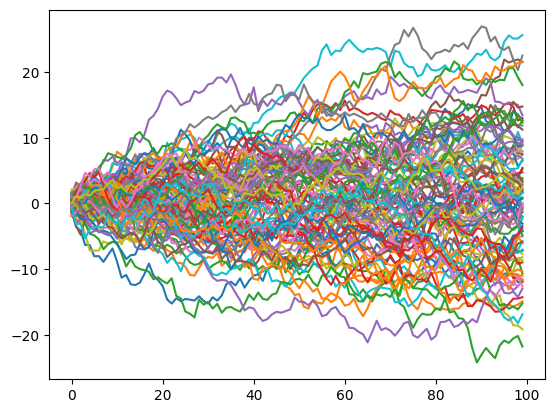

In [42]:
fig, ax = plt.subplots()

for i in df:
    # Graficar ambos random walks en el mismo eje
    ax.plot(df[i])

# Mostrar la figura
plt.show()

Y ¿si son 1000?

In [43]:
for i in range (0,1000):
    x = random_walk()
    #print(x)
    df[i] = x.tolist()

C:\Users\n_sar\AppData\Local\Temp\ipykernel_8304\2429829447.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = x.tolist()
C:\Users\n_sar\AppData\Local\Temp\ipykernel_8304\2429829447.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[i] = x.tolist()
C:\Users\n_sar\AppData\Local\Temp\ipykernel_8304\2429829447.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

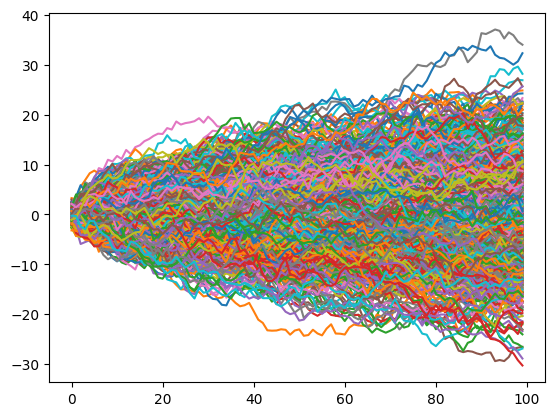

In [44]:
fig, ax = plt.subplots()

for i in df:
    # Graficar ambos random walks en el mismo eje
    ax.plot(df[i])

# Mostrar la figura
plt.show()